# Assignment 3: Data Mining for Networks
Exercise 5

authors:

Lynda Attouche ~  Lenny Klump

In [ ]:
import networkx as nx
import numpy as np

## 1. Computing the random walk kernel value:

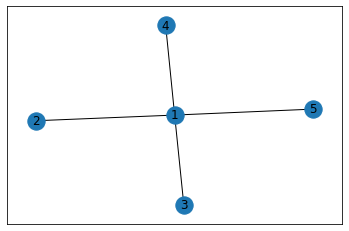

In [ ]:
# Constructing Graph G 

G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5])
G1.add_edges_from([(1,2),(1,3),(1,4),(1,5)])
nx.draw_networkx(G1)

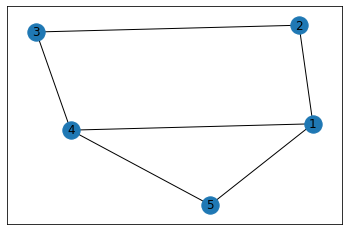

In [ ]:
# Constructing Graph G'

G2 = nx.Graph()
G2.add_nodes_from([1,2,3,4,5])
G2.add_edges_from([(1,2),(1,4),(1,5),(2,3),(3,4),(4,5)])
nx.draw_networkx(G2)

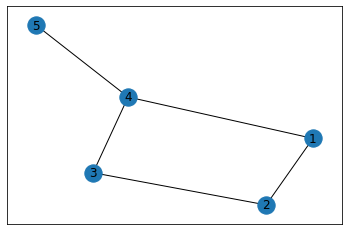

In [ ]:
# Constructing Graph G'' 

G3 = nx.Graph()
G3.add_nodes_from([1,2,3,4,5])
G3.add_edges_from([(1,2),(1,4),(2,3),(3,4),(4,5)])
nx.draw_networkx(G3)

In [ ]:
# Function to Compute the random-walk Kernel 

def randomWalkKernel(G,H): 

  # Computing the direct  product of both Graphs
  G_H_DirectProduct = nx.tensor_product(G, H)

  #draw the direct Direct Product Graph
  #nx.draw_networkx(G_H_DirectProduct)

  # Computing the adjacency matrix af GxH
  G_H_AdjacencyMatrix = nx.adjacency_matrix(G_H_DirectProduct)

  
  # Computing the different walks of lenght 0 to 4
  G_H_WalkLength0 = np.identity(len(G_H_DirectProduct.nodes))
  G_H_WalkLength1 = np.asarray(G_H_AdjacencyMatrix.todense())
  G_H_WalkLength2 = np.asarray((G_H_AdjacencyMatrix ** 2).todense())
  G_H_WalkLength3 = np.asarray((G_H_AdjacencyMatrix ** 3).todense())
  G_H_WalkLength4 = np.asarray((G_H_AdjacencyMatrix ** 4).todense())


  # Cocatenate the Matrices to get the kernel vector
  kernel_Vector_G_H = np.concatenate((G_H_WalkLength0.flatten('F'),G_H_WalkLength1.flatten('F'),G_H_WalkLength2.flatten('F'),G_H_WalkLength3.flatten('F'),G_H_WalkLength4.flatten('F')),axis = None)

  # Compute the Kernel value 
  kernel_value = kernel_Vector_G_H.sum() 

  return kernel_value

In [ ]:
# Computing the Kernel Value of G' and G'' 
G1G2_kernel = randomWalkKernel(G1, G2)

# Computing the Kernel Value of G'' and G''' 
G2G3_kernel = randomWalkKernel(G2, G3)

In [ ]:
print("The kernel value of G' x G'' is: " + str(G1G2_kernel) + " and the kernel value of G'' and G ''' is: " + str(G2G3_kernel)+ ".")

The kernel value of G' x G'' is: 17809.0 and the kernel value of G'' and G ''' is: 22609.0.


##2. Discussion: 

#### The similarity measure of G'' and G''' is higher than the one of G' and G'', that means that there are more walks possible between the nodes, and thus the Graphs are more similar. 

In [ ]:
# Check the Results with the Graph Edit Distance: 

dist_G1G2 = nx.graph_edit_distance(G1, G2)
dist_G2G3 = nx.graph_edit_distance(G2, G3)

print("Graph edit distance between G' and G'' is: " + str(dist_G1G2))
print("Graph edit distance between G'' and G''' is: " + str(dist_G2G3))

Graph edit distance between G' and G'' is: 4.0
Graph edit distance between G'' and G''' is: 1.0


#### The Graph Edit Distance Measure confirms the results, because less changes are necessary to get from G'' to G''' than from G' to G'', this means G'' and G''' are more similiar. 

## 3. Exhibiting other triplets:

In [ ]:
# First Triplet: 

H1 = nx.Graph()
H1.add_nodes_from([1,2,3,4])
H1.add_edges_from([(1,2),(1,3),(1,4)])

H2 = nx.Graph()
H2.add_nodes_from([1,2,3,4])
H2.add_edges_from([(1,2),(1,3),(1,4),(2,3)])

H3 = nx.Graph()
H3.add_nodes_from([1,2,3,4])
H3.add_edges_from([(1,2),(2,3),(3,4),(4,1)])

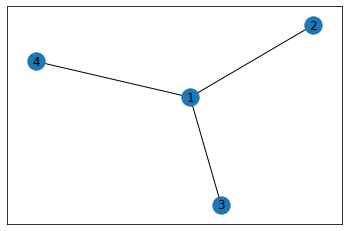

In [ ]:
nx.draw_networkx(H1)

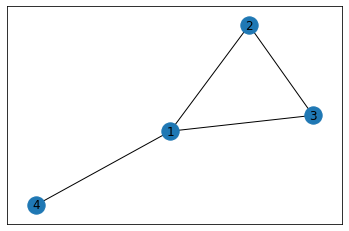

In [ ]:
nx.draw_networkx(H2)

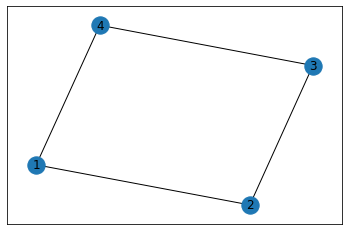

In [ ]:
nx.draw_networkx(H3)

In [ ]:
H1H2_kernel = randomWalkKernel(H1, H2)
H1H3_kernel = randomWalkKernel(H1, H3)

In [ ]:
print("The kernel value of H1 x H2 is: " + str(H1H2_kernel) + " and the kernel value of H1 and H3 is: " + str(H1H3_kernel)+ ". H1 and H2 are more similar.")

The kernel value of H1 x H2 is: 3988.0 and the kernel value of H1 and H3 is: 3136.0. H1 and H2 are more similar.


In [ ]:
# Second Triplet: 

I1 = nx.Graph()
I1.add_nodes_from([1,2,3,4,5])
I1.add_edges_from([(1,2),(1,3),(1,5),(2,4),(2,3), (3,4), (3,5)])

I2 = nx.Graph()
I2.add_nodes_from([1,2,3,4,5])
I2.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,4),(2,3), (3,4), (3,5)])

I3 = nx.Graph()
I3.add_nodes_from([1,2,3,4,5])
I3.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,4)])

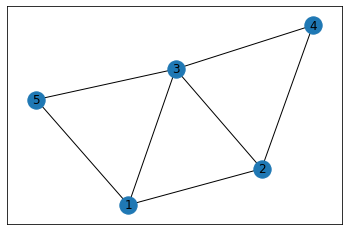

In [ ]:
nx.draw_networkx(I1)

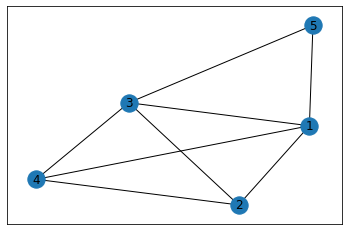

In [ ]:
nx.draw_networkx(I2)

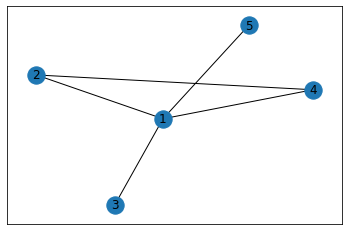

In [ ]:
nx.draw_networkx(I3)

In [ ]:
I1I2_kernel = randomWalkKernel(I1, I2)
I1I3_kernel = randomWalkKernel(I1, I3)

In [ ]:
print("The kernel value of I1 x I2 is: " + str(I1I2_kernel) + " and the kernel value of I1 and I3 is: " + str(I1I3_kernel)+ ". I1 and I2 are more similar.")

The kernel value of I1 x I2 is: 238073.0 and the kernel value of I1 and I3 is: 58489.0. I1 and I2 are more similar.


In [ ]:
# Third Triplet: 

J1 = nx.Graph()
J1.add_nodes_from([1,2,3,4,5,6])
J1.add_edges_from([(1,2),(1,6),(1,5),(2,3),(3,4),(3,6),(4,5),(5,6)])

J2 = nx.Graph()
J2.add_nodes_from([1,2,3,4,5,6])
J2.add_edges_from([(1,2),(1,6),(2,3),(3,4),(3,6),(4,5),(5,6)])

J3 = nx.Graph()
J3.add_nodes_from([1,2,3,4,5,6])
J3.add_edges_from([(1,3),(1,4),(1,5),(1,6),(1,2)])

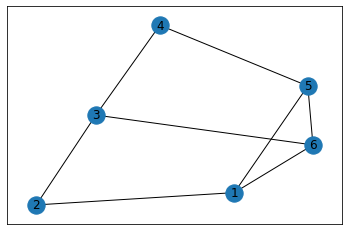

In [ ]:
nx.draw_networkx(J1)

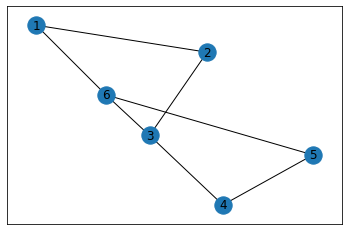

In [ ]:
nx.draw_networkx(J2)

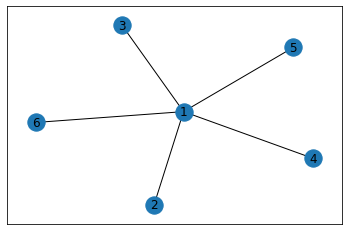

In [ ]:
nx.draw_networkx(J3)

In [ ]:
J1J2_kernel = randomWalkKernel(J1, J2)
J1J3_kernel = randomWalkKernel(J1, J3)

In [ ]:
print("The kernel value of J1 x J2 is: " + str(J1J2_kernel) + " and the kernel value of J1 and J3 is: " + str(J1J3_kernel)+ ". J1 and J2 are more similar.")

The kernel value of J1 x J2 is: 76936.0 and the kernel value of J1 and J3 is: 57016.0. J1 and J2 are more similar.
